In [ ]:
! wget https://cb.lk/covid_19

In [ ]:
! unzip covid_19

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import *
from keras.models import Sequential
import os 
import numpy as np
import matplotlib.pyplot as plt

In [27]:
train_path = 'CovidDataset/Train'
val_path = 'CovidDataset/Val'

train_gen = ImageDataGenerator(rescale=1.0/255,
                               shear_range= 0.2,
                               zoom_range= 0.2,
                               horizontal_flip=True)
train_generator = train_gen.flow_from_directory(train_path,target_size=(256,256),batch_size = 3,shuffle = True ,class_mode='binary')

val_gen = ImageDataGenerator(rescale=1.0/255)
val_generator = val_gen.flow_from_directory(val_path,target_size=(256,256),batch_size = 3,shuffle = True ,class_mode='binary')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


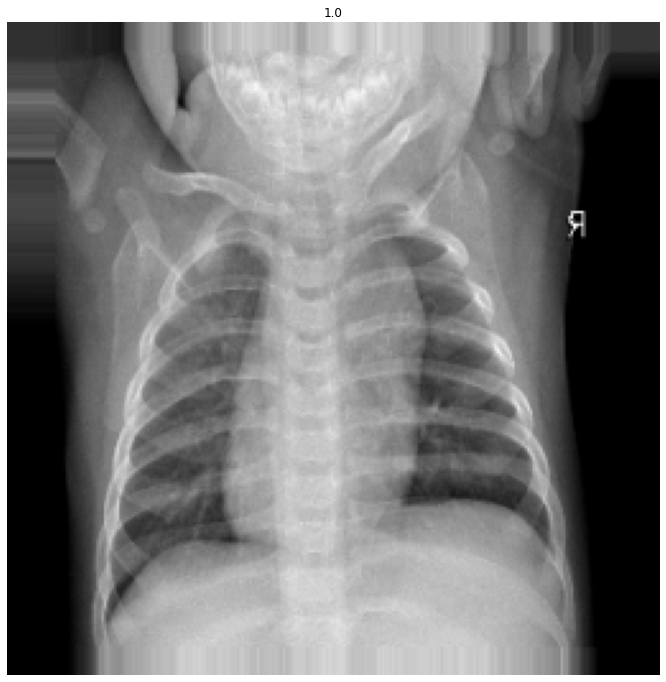

In [28]:
from IPython.core.pylabtools import figsize
for x,y in train_generator:
  plt.figure(figsize(12,12))
  plt.imshow(x[0])
  plt.title(y[0])
  plt.axis('off')
  plt.show()
  break

In [40]:
model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', input_shape = (256,256,3) ))
model.add(Convolution2D(64,(3,3),activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))


model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 conv2d_49 (Conv2D)          (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 126, 126, 64)     0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 126, 126, 64)      0         
                                                                 
 conv2d_50 (Conv2D)          (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                

In [41]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )
hist = model.fit_generator(train_generator, steps_per_epoch= 8, epochs= 20, validation_data=val_generator,validation_steps=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
8/8 [==============================] - 11s 1s/step - loss: 1.3073 - accuracy: 0.5417 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 10s 1s/step - loss: 0.6992 - accuracy: 0.5217 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 10s 1s/step - loss: 0.6782 - accuracy: 0.5833 - val_loss: 0.6616 - val_accuracy: 0.6667
Epoch 4/20
8/8 [==============================] - 10s 1s/step - loss: 0.6863 - accuracy: 0.5417 - val_loss: 0.6801 - val_accuracy: 0.5833
Epoch 5/20
8/8 [==============================] - 11s 1s/step - loss: 0.6357 - accuracy: 0.6250 - val_loss: 0.6379 - val_accuracy: 0.6667
Epoch 6/20
8/8 [==============================] - 10s 1s/step - loss: 0.7057 - accuracy: 0.5833 - val_loss: 0.6258 - val_accuracy: 0.5833
Epoch 7/20
8/8 [==============================] - 10s 1s/step - loss: 0.6537 - accuracy: 0.6250 - val_loss: 0.6239 - val_accuracy: 0.9167
Epoch 8/20
8/8 [==================

In [42]:
logs = hist.history

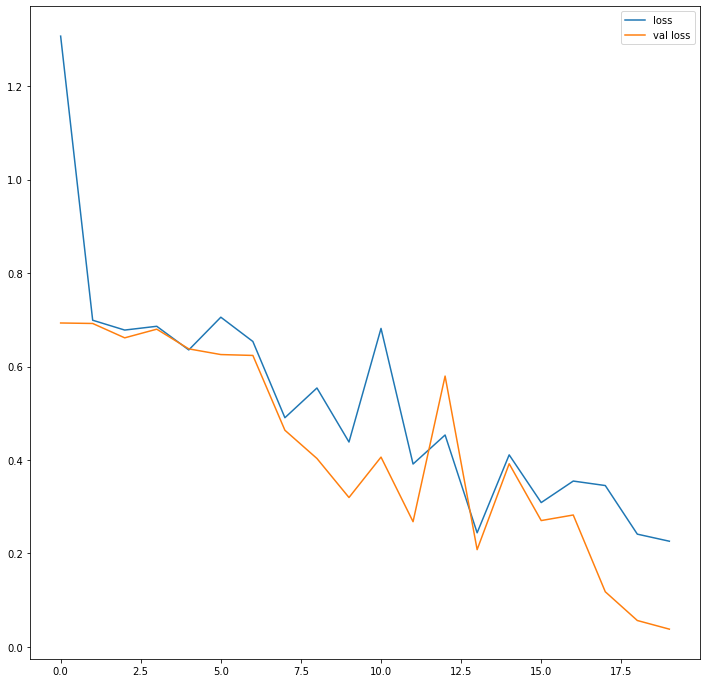

In [44]:
plt.plot(logs['loss'],label = 'loss')
plt.plot(logs['val_loss'], label = 'val loss')
plt.legend()
plt.show()